#**Fetal Health Classification**
####Final Project by Oki Samila Rici







#**Data Background**
The dataset includes fetal health classifications determined by obstetricians using cardiotocography (CTG) equipment.

One of the causes of the high infant mortality rate is hypoxia experienced by the fetus. Fetal hypoxia is a condition in which there are low oxygen levels and increased levels of carbon dioxide in the fetal blood.This is actually avoidable, as CTG can be used to monitor the fetus's well-being.

CTG is a tool used to monitor the activity and heart rate of the fetus as well as uterine contractions while the baby is in the womb. Through this examination, doctors can evaluate a healthy fetus before and during childbirth. If there are changes or fetal distress conditions, the doctor can immediately provide help. Monitoring is recommended when the pregnancy enters the 3rd trimester or is more than 28 weeks pregnant.

CTG generally includes two small plates that are placed on the surface of the abdomen using an elastic belt that is wrapped around the pregnant woman's abdomen. One plate is used to measure the fetal heart rate, while the other plate is used to measure the strength and contractions of a pregnant woman's uterus.

Before CTG is used, the doctor will apply a special gel first to the pregnant woman's stomach. After that, the plates and belts from the CTG will be attached to the pregnant woman's stomach.

After a few minutes, the CTG dish connected to the CTG machine will display data on uterine contractions, fetal heart rate, and fetal activity in the uterus via the monitor screen. The data can also be printed on special paper that depicts the CTG graph.

Data source by Kaggle https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification.


###**Questions**
* What is the best model for predicting this data, and what is the this dataset percent accuracy?
* What variables can be used to categorize a fetus, and what is the relatioanship between these variables?



###**Objective Statement**
* Create a predictive model to know the normal fetus to prevent the adverse fetal outcome.
* Analyze the features that can be used to categorize the state of the fetus and find out the relationship between these features.


###**Expected Outcome**
* Obtain the best model from several machine learning models that can be used as a reference in determining the correctness of the dataset in predicting fetal well-being.
* Know about how a normal fetus can prevent fetal death.
* Know the variables that determine the category of the fetus and how the relationship between these variables.

##**Data Dictionary**
  * baseline_FHR: basic heart rate when the uterus is at rest (per minute).
  * accelerations: increase in fetal heart rate (per second).
  * fetal_movement: calculation of baby kicks (per second).
  * uterine_contractions: fetal contractions to measure labor activity (per second).
  * light_decelerations: light decrease in heart rate (per second).
  * severe_decelerations: severe decrease in heart rate (per second).
  * prolongued_deceleratons: prolonged decrease in heart rate (per second).
  * percentage_STV: percentage of time the heart rate interval differs in the short-term variability.
  * mean_STV: the average value of the difference in heart rate intervals in short-term variability.
  * percentage_LTV: percentage of the time difference in heart rate interval long-term variability.
  * mean_LTV: the average value of the difference in heart rate intervals in long_term variability.
  * histogram_width : width of FHR histogram
  * histogram_min : minimum of FHR histogram
  * histogram_max : maximum of FHR histogram
  * histogram_number_of_peaks : number of histogram peaks
  * histogram_number_of_zeros : number of histogram zeros
  * histogram_mode : histogram mode
  * histogram_mean : histogram mean
  * histogram_median : histogram median
  * histogram_variance : histogram variance
  * histogram_tendency : histogram tendency

#**Introducing Libraries dan Dataset**

##**Import Library**

In [1]:
#import libraries
import warnings
warnings.simplefilter(action ="ignore")

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Import the necessary packages
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
color=["teal","orange","palevioletred"]
plt.style.use('seaborn-darkgrid')

# Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std

In [2]:
pip install xgboost==1.2.0

     |████████████████████████████████| 148.9 MB 32 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


##**Load Dataset**

In [3]:
# Import Dataset 
df = pd.read_csv("/content/sample_data/fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

The dataset contains 22 columns and 2126 rows. There are ten features histogram that doesn't have a clear explanation from the source and also don't know a relationship with the target variable. Thus, the columns will be deleted. The analysis will focus on uterine contractions, fetal movement, and an increase and decrease in fetal heart rate. Some of the columns will be renamed to make them easier to understand.

In [5]:
# change the names of some columns for easier understanding
df.rename(columns={"baseline value":"baseline_FHR","abnormal_short_term_variability":"percentage_STV",
                  "mean_value_of_short_term_variability":"mean_STV","percentage_of_time_with_abnormal_long_term_variability":"percentage_LTV",
                  "mean_value_of_long_term_variability":"mean_LTV"}, inplace=True)

In [6]:
# drop tables histogram
df = df.drop(columns=['histogram_width','histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode',
            'histogram_mean','histogram_median','histogram_variance','histogram_tendency'])


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   baseline_FHR              2126 non-null   float64
 1   accelerations             2126 non-null   float64
 2   fetal_movement            2126 non-null   float64
 3   uterine_contractions      2126 non-null   float64
 4   light_decelerations       2126 non-null   float64
 5   severe_decelerations      2126 non-null   float64
 6   prolongued_decelerations  2126 non-null   float64
 7   percentage_STV            2126 non-null   float64
 8   mean_STV                  2126 non-null   float64
 9   percentage_LTV            2126 non-null   float64
 10  mean_LTV                  2126 non-null   float64
 11  fetal_health              2126 non-null   float64
dtypes: float64(12)
memory usage: 199.4 KB


After the histogram column is removed, there are 12 columns and 1 column is the target variable, namely fetal health. All columns are numeric with type float.

 



#**Baseline Model**

The baseline model aims to compare with modeling after data cleansing. To assess the model, a benchmark is needed. A baseline model can serve as a benchmark, enabling a more informative evaluation of a modeling. 

You can support a model if it addresses the flaws of the baseline and displays a stronger overall performance. If the modeling does not perform better than the baseline model, it means that the model’s added complexity does not provide enough benefit. Incorporating baseline models mitigates the risk of adding unneeded model complexity.

A baseline model can also provide insight by showing which features it deems to be most significant. This is helpful since the model’s assessment of which features are important should be supported by the domain knowledge of the subject. If a trained model neglects features that should be important, it could mean that the data fails to properly capture the information representing those features.

####**Split the Data**

In [8]:
# separating the independent and dependent variables
X = df.drop(['fetal_health'],axis = 1)
y = df['fetal_health']

In [9]:
# split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('Shape of training set ', X_train.shape)
print('Shape of test set ', X_test.shape)

Shape of training set  (1700, 11)
Shape of test set  (426, 11)


##**Modeling**

In [10]:
classifiers = [RandomForestClassifier(),
              DecisionTreeClassifier(),
              GradientBoostingClassifier(),
              xgb.XGBClassifier()]

model = pd.DataFrame(columns = ['Method', 'F1 Score'])

In [11]:
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  preds = classifier.predict(X_test)
  preds_prob= classifier.predict_proba(X_test)

  method = str(type(classifier)).split('.')[-1][:-2]

  # F1 Score
  scr = f1_score(y_test, preds, average="weighted")

  model = model.append({'Method': method,
                        'F1 Score' : scr
                        },ignore_index=True)

In [12]:
model

,Method,F1 Score
0,RandomForestClassifier,0.953989
1,DecisionTreeClassifier,0.918532
2,GradientBoostingClassifier,0.941394
3,XGBClassifier,0.946082


The F1 score is very high and modeling will be carried out using cross-validation to evaluate the model. The use of cross-validation parameters to obtain a more stable and more accurate F1 Score value.


##**Baseline Model with Cross Validation**

####**Random Forest**

In [13]:
RF =  RandomForestClassifier()
RF_result = cross_val_score(RF, X, y, cv = 5, scoring = "f1_macro").mean()
print('Random Forest:' , RF_result)

Random Forest: 0.7365510332411371


####**Decision Tree**

In [14]:
DT = DecisionTreeClassifier()
DT_result = cross_val_score(DT, X, y, cv = 5, scoring = "f1_macro").mean()
print('Decision Tree: ', DT_result)

Decision Tree:  0.7055167365223783


####**GradientBoosting**

In [15]:
GB = GradientBoostingClassifier()
GB_result = cross_val_score(GB, X, y, cv = 5, scoring = "f1_macro").mean()
print('Gradient Boosting: ', GB_result)

Gradient Boosting:  0.7996256198637144


####**XGBoost**

In [16]:
XGB = xgb.XGBClassifier()
XGB_result = cross_val_score(XGB, X, y, cv = 5, scoring = "f1_macro").mean()
print('XGBoost: ', XGB_result)

XGBoost:  0.775145932685415


It can be seen that before using cross-validation, The F1 Score value for each model is high, reaching 94%, and also don't stable.The best model is Gradient-boosting with an F1 score of 79% using cross-validation.

Note: The explanation of the model selection can be found in the point the target variable check, and the metric used can be found in the point the boxplot to detect outliers.

#**Data Cleansing**

##**Missing Value Check**

In [17]:
# missing value check
df.isnull().sum()

baseline_FHR                0
accelerations               0
fetal_movement              0
uterine_contractions        0
light_decelerations         0
severe_decelerations        0
prolongued_decelerations    0
percentage_STV              0
mean_STV                    0
percentage_LTV              0
mean_LTV                    0
fetal_health                0
dtype: int64

The dataset doesn't have missing values.



Note:

For numeric data:
* If the missing data is more than 60%, then drop the column.
* If less than 60% can be done drop the rows. In addition, it can fill in the mean value for data that has a normal distribution and if the data is skewed, it can fill in the median value.

For categorical data:
* If the missing data is more than 60%, then drop the column.
* If less than 60% can be done drop the rows. In addition, it can fill with the value of the mode, which is the value that occurs frequently. or it can be filled with a constant value by forming a new column, namely others.

The purpose of handling missing values is to make the data easier to analyze and the data to be more accurate as well as the machine learning model is to be made more powerful and without errors.

##**Duplicate Data Check**

In [18]:
# duplicated data check
df.duplicated().sum()

14

Duplicate data can cause the model to misunderstand the data. The model will learn patterns that do not exist in reality or the model will study the same data as many duplicates. So it will produce a high accuracy value. We will assume a high accuracy value is good, but it is not. Therefore, before building a machine learning model we have to clean up duplicate data by deleting it. So that the modeling is more accurate.

In this dataset, there are 14 rows of duplicate data that will be deleted.

###**Drop Duplicated Data Rows**

In [19]:
# drop duplicated rows
df = df.drop_duplicates()

In [20]:
# sanity check
df.duplicated().sum()

0

In [21]:
len(df)

2112

After removing duplicate data, the number of rows is 2112.

#**Data Understanding**

##**Statistical Summary**

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline_FHR,2112.0,133.304924,9.839778,106.0,126.000,133.000,140.000,160.000
accelerations,2112.0,0.003190,0.003872,0.0,0.000,0.002,0.006,0.019
fetal_movement,2112.0,0.009522,0.046814,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2112.0,0.004384,0.002939,0.0,0.002,0.005,0.007,0.015
light_decelerations,2112.0,0.001901,0.002966,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2112.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2112.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
percentage_STV,2112.0,46.987216,17.179144,12.0,32.000,49.000,61.000,87.000
mean_STV,2112.0,1.334328,0.884002,0.2,0.700,1.200,1.700,7.000
percentage_LTV,2112.0,9.799716,18.340176,0.0,0.000,0.000,11.000,91.000


* min and max values for each column look appropriate.
* mean > median in acceleration, fetal_movement, mild_deceleration, severe_deceleration, prolonged_deceleration, mean_STV, LTV_percentage, mean_LTV, and fetal health, indicating a positively skewed distribution.
* mean < median in uterine_contraction and STV_percentage, indicating a negatively skewed distribution. We will see this more clearly in the KDE plot distribution point.

##**Target Variable Check**

In [23]:
# change the data type of the target variable column to float
df.fetal_health = df.fetal_health.astype(int)
df.fetal_health.dtype

dtype('int64')

In [24]:
# variabel target check
fh_count=df.fetal_health.value_counts(normalize=False)
fh_count

1    1646
2     292
3     174
Name: fetal_health, dtype: int64

Meaning of the target variables:
  * 1 = Normal
  * 2 = Suspected
  * 3 = Pathological

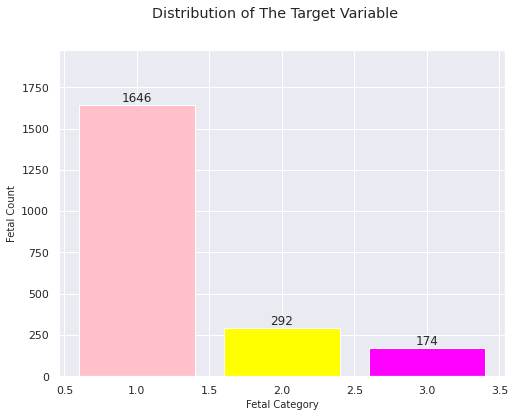

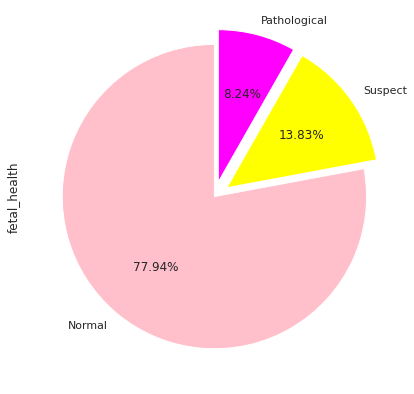

In [25]:
# distribution of target variable
colors = ['pink','yellow','magenta']

x = fh_count.index
y = fh_count.values
sns.set(font_scale=1)
plt.figure(figsize=(8,6))
plt.bar(x=x, height=y, color=colors)
plt.suptitle('Distribution of The Target Variable')
plt.xlabel("Fetal Category", fontsize=10)
plt.ylabel("Fetal Count", fontsize=10)

for i in range(len(y)):
    plt.annotate(str(y[i]), xy=(x[i],y[i]), ha='center', va='bottom')
plt.margins(y=0.2)

plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
df['fetal_health'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=[0,0.1,0.1], 
                                       startangle=90, colors=["pink", "yellow", "magenta"],
                                      labels = ['Normal','Suspect','Pathological'])

plt.show()

The count plot of the target variable indicates an imbalanced class. This means we cannot use accuracy as a metric to evaluate the performance of our model. The most appropriate metric for model evaluation can be:
  * AUC : classifer accuracy for imbalanced data
  * Precision : predicted positive rate 
  * Recall : actual positive rate  
  * F1 Score : the average of recall and precision

Among the 4 matrices to be used is the F1 score because it is to summarize precision and recall by taking the harmonic alignment of both. Therefore we can minimize the false-positive and the false-negative rate.

#**Univariate Analysis**

##**Boxplot to Detect Outliers**

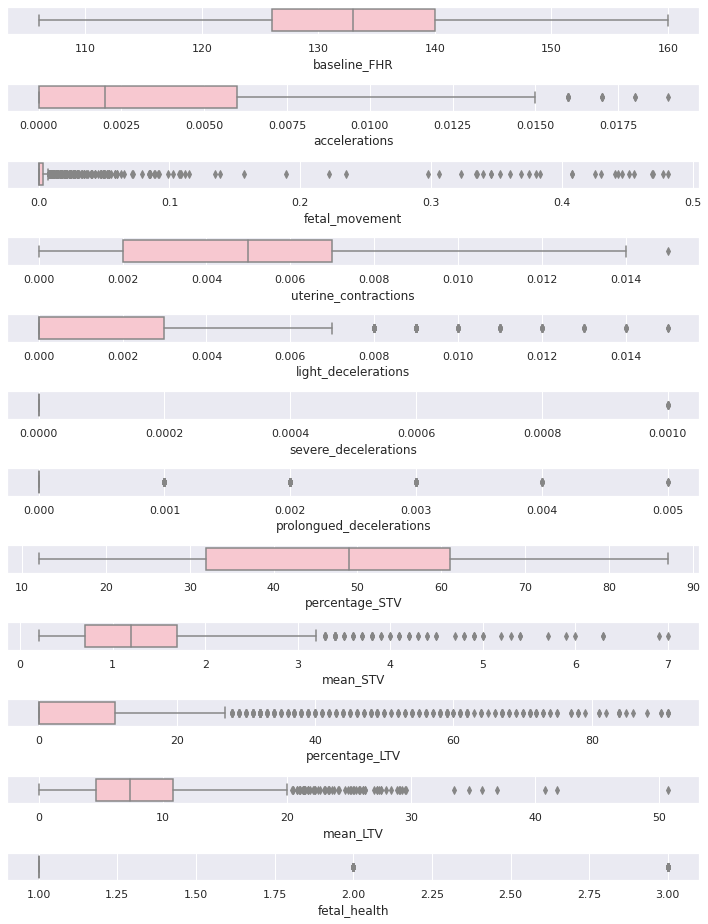

In [26]:
features = list(df)
plt.figure(figsize=(10, 13))
for i in range(0, len(features)):
    plt.subplot(12, 1, i+1)
    sns.boxplot(df[features[i]],orient='h', color = 'pink')
    plt.tight_layout()

The Boxplot shows that the average of variables has many outliers. So that some models that will use are robust models against outliers are:
  * Random Forest 
  * Desicion Tree
  * Gradient Boosting
  * XGBoost

Note : This dataset doesn't use log transformation because it doesn't improve the value F1 Score.

##**KDE Plot for Knowing the Distribution**

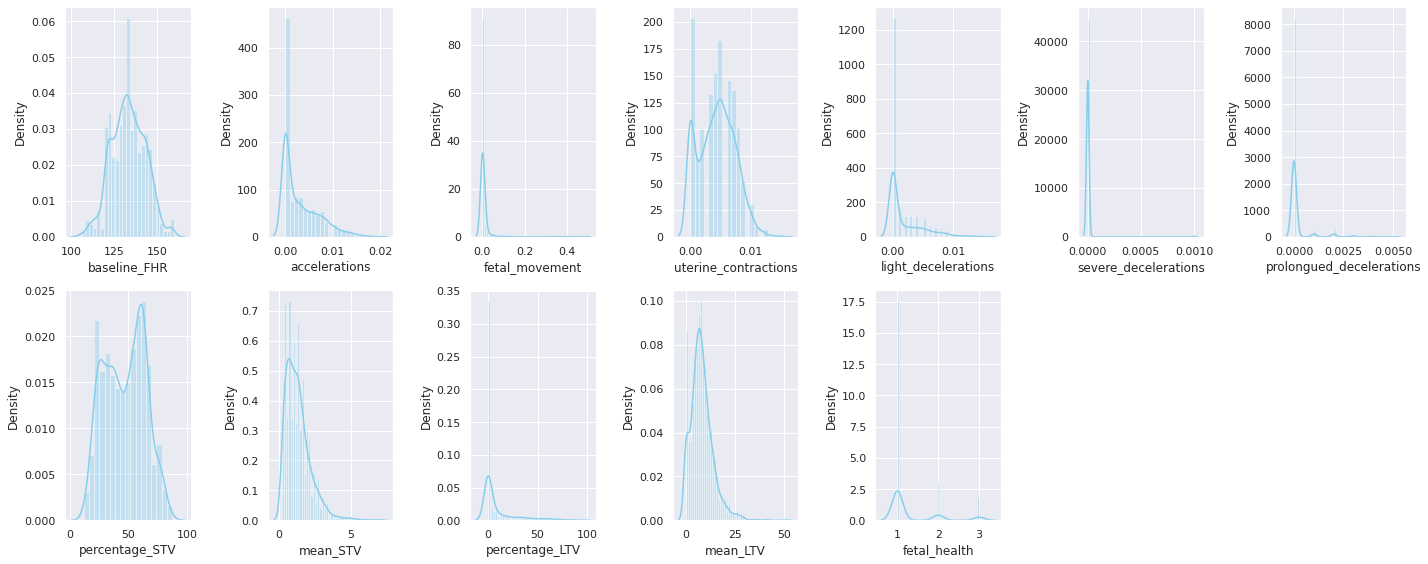

In [27]:
# adjust the figure size for better readability
numericals = ['baseline_FHR','accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','percentage_STV','mean_STV','percentage_LTV','mean_LTV','fetal_health']
plt.figure(figsize=(20,8))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

* baseline_FHR has the most symmetrical distribution
* uterine_contraction and percentage_STV variable are bimodal because they have two peaks. This means it has the 2 highest values in the each fetaures. 
* Features that have a positively skewed are acceleration, fetal_movement, light_deceleration, severe_deceleration, prolongued_deceleration, mean_STV, percentage_LTV, and mean_LTV.
* fetal_health is a target variable that has 3 values. Dominated by a value of 1 or a normal fetus which gives a positive skewed indication.

#**Bivariate Analysis**

##**Multicollinearity Study**

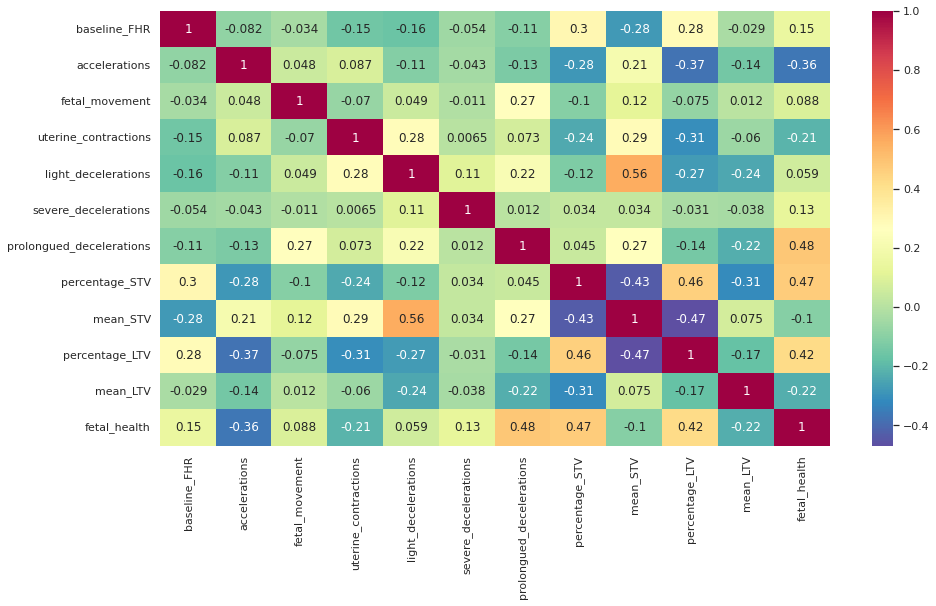

In [28]:
# correlation heatmap
plt.figure(figsize=(15,8))
sns.set(font_scale=1)
sns.heatmap(df.corr(), annot=True, cmap='Spectral_r');

* There are no features that are highly correlated with thresholds greater than 0.80. As a result, no features are removed.

* prolongued_decelerations, percentage_STV, and percentage_LTV have a strong correlation with the target variable, which means that when the values are higher with a comparison of the baseline values in normal fetuses, it will indicate a pathological.

* Meanwhile, features that have a negative correlation with the target variable are accelerations, uterine contractions, and mean_STV, which means that when the value is low with a comparison of the baseline values of a normal fetus, it will indicate a pathological.


##**Exploratory Data Analysis**

In the exploratory data analysis, only a few features will be taken for analysis, namely baseline_FHR, acceleration, fetal movement, uterine contractions, and decelerations. The deceleration that will be selected is a prolonged deceleration due to a high decrease in the fetal heart rate. The STV and LTV features were not analyzed because these figures are percentages and the mean and the benchmark for the STV and LTV numbers are not known. So, it may be more difficult to analyze.

####**Baseline Fetal Heart Rate**

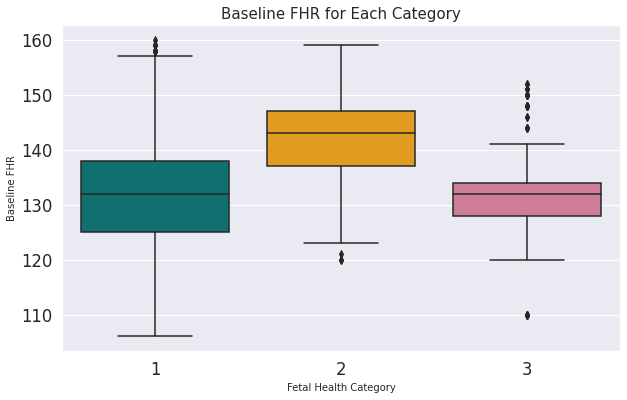

In [29]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="fetal_health", y="baseline_FHR", palette=color)
plt.title('Baseline FHR for Each Category', fontsize=15)
plt.xlabel('Fetal Health Category', fontsize=10)
plt.ylabel('Baseline FHR', fontsize=10);

Fetal Heart Rate baseline conditions for all fetal categories are normal. Because in the normal fetus of the fetal heart baseline range between 110-160 bpm. So, the suspect and pathological also range from 110  - 160 bpm, which means that it is included in the normal fetal condition.

As a result, the baseline fetal heart rate doesn't provide information in the data set for prediction because it is already in normal conditions for all fetuses. Thus, in suspect and pathological cases, it is not a physiological problem that leads to fetal compromise.

###**Accelerations**

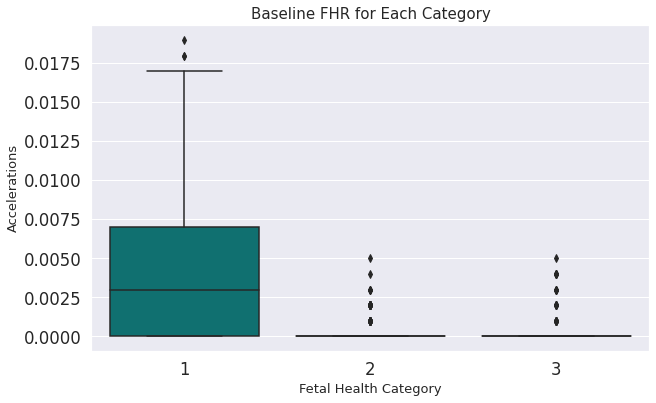

In [30]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="fetal_health", y="accelerations", palette=color)
plt.title('Baseline FHR for Each Category', fontsize=15)
plt.xlabel('Fetal Health Category', fontsize=13)
plt.ylabel('Accelerations', fontsize=13);

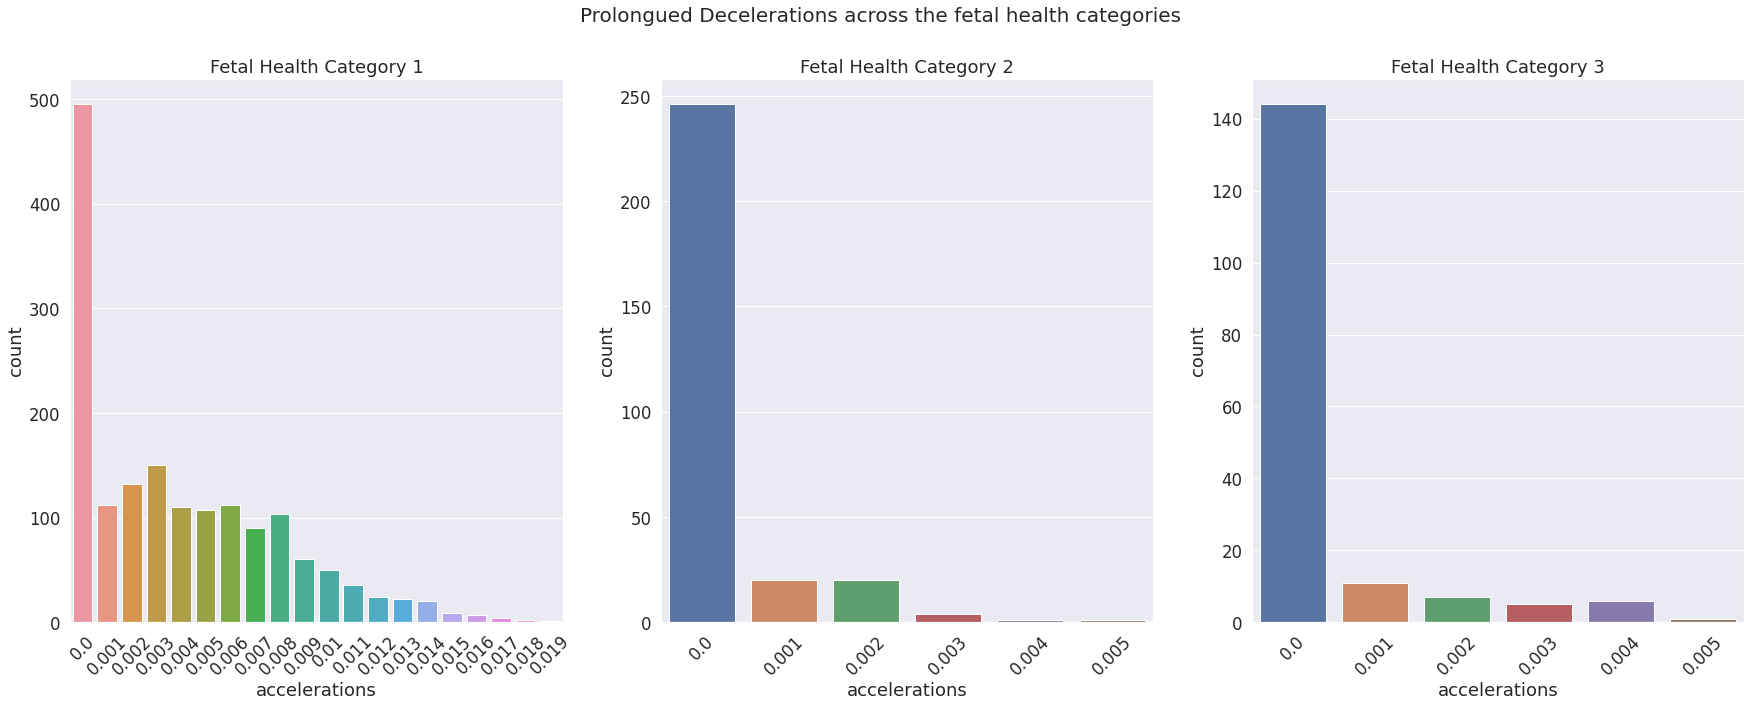

In [31]:
df['accelerations']=df.accelerations.round(3)
fig, ax = plt.subplots(1,3, figsize=(30,10))

for i in range(1,4):
    sns.countplot(data=df[df.fetal_health==i], x="accelerations", ax=ax[i-1])
    ax[i-1].tick_params(axis='x', rotation=45)
    ax[i-1].set_title(f"Fetal Health Category {i}")

fig.suptitle("Prolongued Decelerations across the fetal health categories", fontsize=20);

The two charts above show that the median value in normal fetuses is much higher than the median value in suspect and pathological fetuses, which appears to be 0. Normal fetal acceleration ranges from 0 to 0.0019 per second, While the acceleration in suspected and pathological cases does not exceed 0.0050 per second. It can be concluded that a healthy fetus experiences acceleration.

###**Fetal Movement**

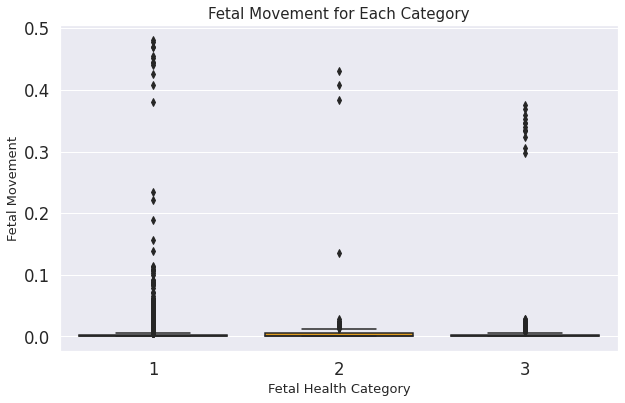

In [32]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="fetal_health", y="fetal_movement", palette=color)
plt.title('Fetal Movement for Each Category', fontsize=15)
plt.xlabel('Fetal Health Category', fontsize=13)
plt.ylabel('Fetal Movement', fontsize=13);

It can be seen that in all three cases, the majority of the fetal movements are in the range of 0-0.1, in the normal case with outliers extending to 0.5, for suspected till between 0.4 and 0.5 and for pathological the values remain just below 0.4, none beyond. So, based on the median value all categories of fetuses did not experience fetal movement.

###**Uterine Contractions**

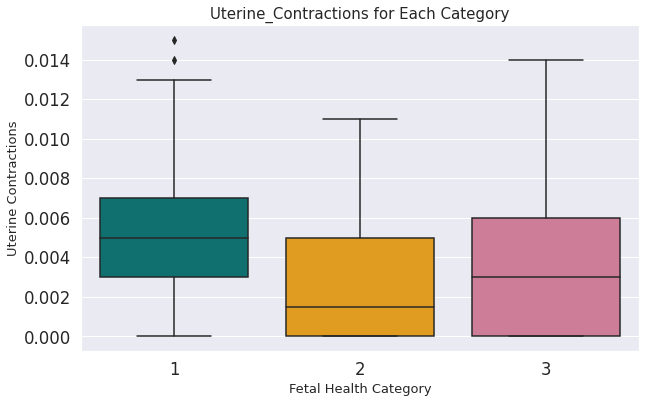

In [33]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="fetal_health", y="uterine_contractions", palette=color)
plt.title('Uterine_Contractions for Each Category', fontsize=15)
plt.xlabel('Fetal Health Category', fontsize=13)
plt.ylabel('Uterine Contractions', fontsize=13);

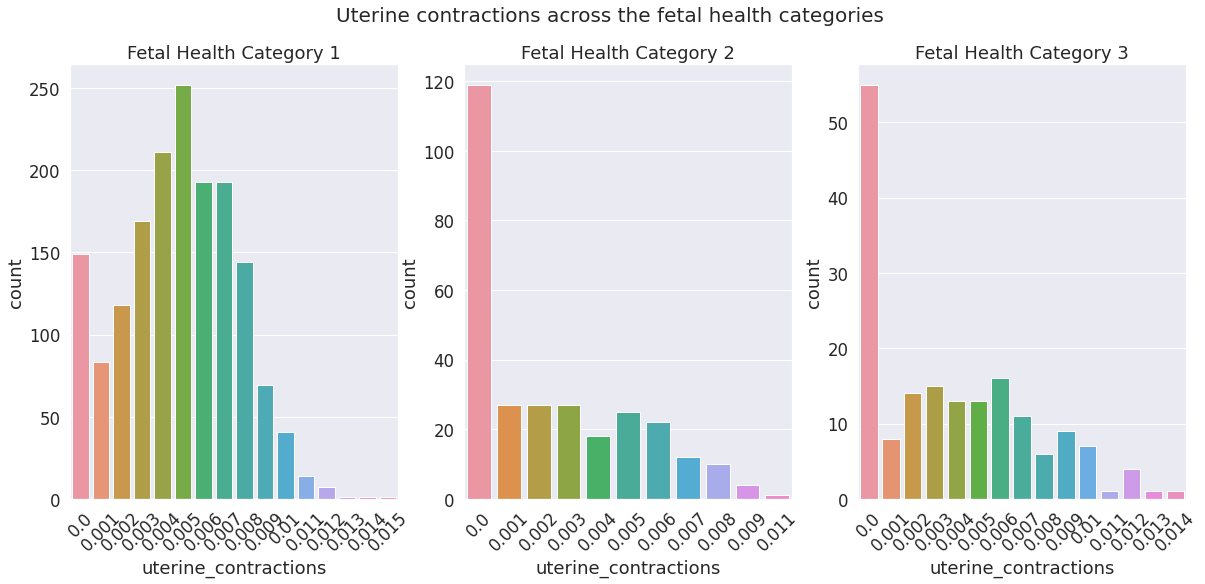

In [34]:
df['uterine_contractions']=df.uterine_contractions.round(3)
fig, ax = plt.subplots(1,3, figsize=(20,8))

for i in range(1,4):
    sns.countplot(data=df[df.fetal_health==i], x="uterine_contractions", ax=ax[i-1])
    ax[i-1].tick_params(axis='x', rotation=45)
    ax[i-1].set_title(f"Fetal Health Category {i}")

fig.suptitle("Uterine contractions across the fetal health categories", fontsize=20);

It can be seen that a normal fetus experienced uterine contractions more frequently than suspect and pathological. Most of the fetuses in the suspect and pathological categories did not experience uterine contractions at all. So, it can be concluded that a healthy fetus experiences uterine contractions.

###**Prolonged Decelerations**

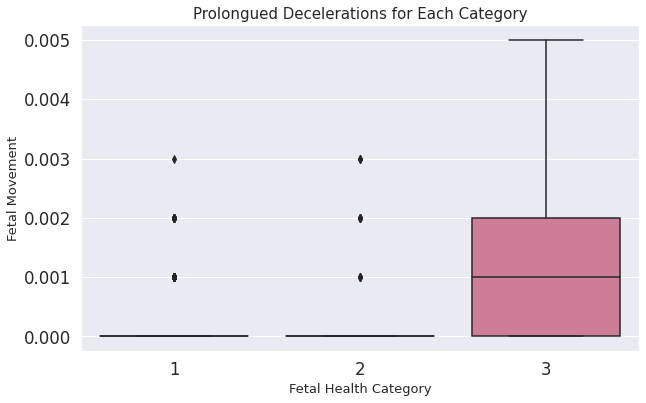

In [35]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="fetal_health", y="prolongued_decelerations", palette=color)
plt.title('Prolongued Decelerations for Each Category', fontsize=15)
plt.xlabel('Fetal Health Category', fontsize=13)
plt.ylabel('Fetal Movement', fontsize=13);

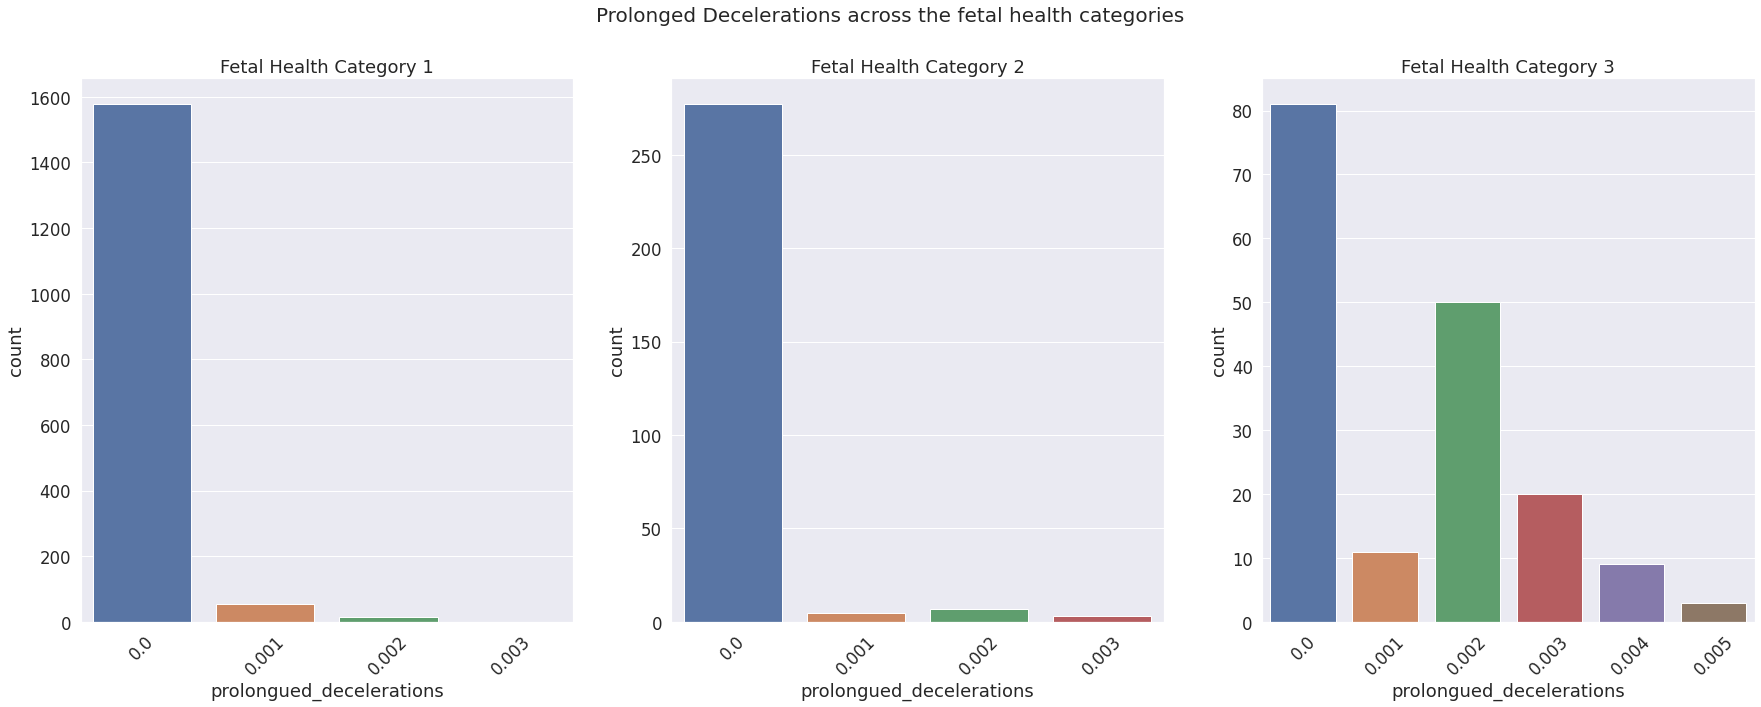

In [36]:
df['prolongued_decelerations']=df.prolongued_decelerations.round(3)
fig, ax = plt.subplots(1,3, figsize=(30,10))

for i in range(1,4):
    sns.countplot(data=df[df.fetal_health==i], x="prolongued_decelerations", ax=ax[i-1])
    ax[i-1].tick_params(axis='x', rotation=45)
    ax[i-1].set_title(f"Fetal Health Category {i}")

fig.suptitle("Prolonged Decelerations across the fetal health categories", fontsize=20);

The two charts above show that:
* Normal fetus: All fetuses except a few show 0 prolonged deceleration.
* Suspect: All fetuses here also show 0 prolonged decelerations.
* Pathological: pathological cases occur at a rate ranging from 0 to 0.005 per second.

As a result, a healthy fetus does not experience prolonged deceleration.

Based on several features analyzed, it appears that uterine contractions, accelerations, and prolonged decelerations are determinants of fetal classifications. These features clearly distinguish between normal, suspected, and pathological fetuses. Now let's see how the relationship or effect of prolonged acceleration and deceleration when uterine contractions occur.

###**Relationship Between uterine Contractions and Accelerations**

<Figure size 720x576 with 0 Axes>

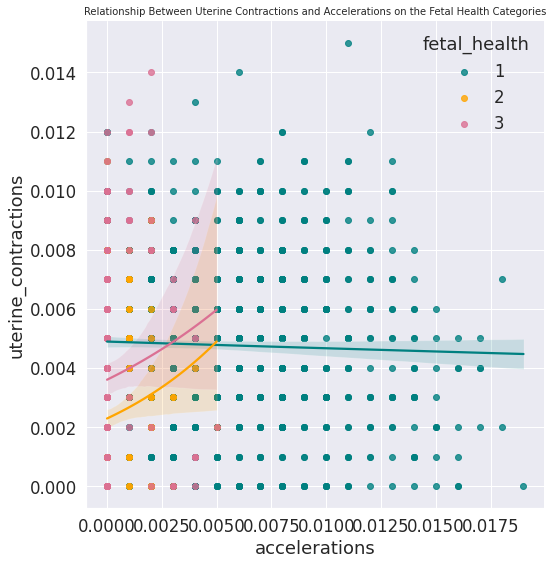

In [37]:
plt.figure(figsize=(10,8))
sns.lmplot(data=df, x="accelerations", y="uterine_contractions", 
           hue="fetal_health", aspect=1, height=8, logistic=True, palette=color,
           facet_kws={"legend_out":False})
plt.title("Relationship Between Uterine Contractions and Accelerations on the Fetal Health Categories", fontsize=10);

In the regression plot, we can see the difference between each type of fetal health:
* for normal type fetus (1): negative correlation between uterine contractions and acceleration. When uterine contractions decreases, acceleration increases.
* for suspected and pathological fetal types (2 and 3): positive correlation between uterine contractions and acceleration. When the uterine contractions increase, the acceleration also increases. 

So, a healthy fetus is when uterine contractions decrease, and there is an acceleration or increase in fetal heart rate.

###**Relationship Between Uterine Contractions and Prolonged Decelerations**

<Figure size 720x576 with 0 Axes>

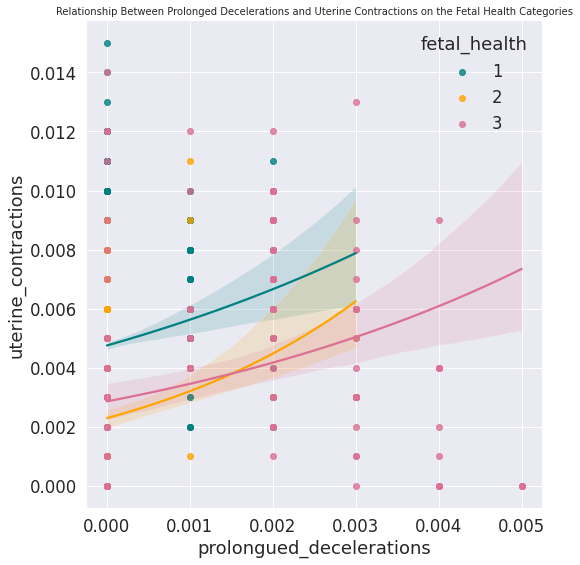

In [38]:
plt.figure(figsize=(10,8))
sns.lmplot(data=df, x="prolongued_decelerations", y="uterine_contractions", 
           hue="fetal_health", aspect=1, height=8, logistic=True, palette=color,
           facet_kws={"legend_out":False})
plt.title("Relationship Between Prolonged Decelerations and Uterine Contractions on the Fetal Health Categories", fontsize=10);

we can see that for all types of fetuses, there is a positive correlation between uterine contractions and prolonged deceleration. As uterine contractions increase, prolonged decelerations also increase. 

It can be concluded that, when uterine contractions increase, there is an increase in prolonged decelerations or a decrease in the fetal heart rate. However, less than 0.003 per second. The difference with the suspect is that the uterine contractions are below normal fetus. While pathological, uterine contractions under normal conditions and prolonged exceed 0.003 per second.

#**Modeling and Evaluation**

###**Split the Data**

In [39]:
# separating the independent and dependent variables

X = df.drop(labels = ['fetal_health'], axis = 1)
y = df['fetal_health']
print("Shape of X is {} and that of y is {}".format(X.shape, y.shape))

Shape of X is (2112, 11) and that of y is (2112,)


In [40]:
# Splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print('Shape of training set ', X_train.shape)
print('Shape of test set ', X_test.shape)

Shape of training set  (1689, 11)
Shape of test set  (423, 11)


##**Scaling**

In [41]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)

##**Modeling**

###**Random Forest**

In [42]:
rf =  RandomForestClassifier()
RF = rf.fit(X_train_transformed, y_train)

Rf = make_pipeline(preprocessing.StandardScaler(),RF)
RF_result = cross_val_score(Rf, X, y, cv = 5, scoring = "f1_macro").mean()
print('Random Forest:' , RF_result)

Random Forest: 0.73255103363536


###**Decision Tree**

In [43]:
dt = DecisionTreeClassifier()
DT = dt.fit(X_train_transformed, y_train)

Dt = make_pipeline(preprocessing.StandardScaler(),DT)
DT_result = cross_val_score(Dt, X, y, scoring = 'f1_macro', cv=5).mean()
print('Decision Tree: ', DT_result)

Decision Tree:  0.6972265854363033


###**Gradient Boosting**

In [44]:
gb = GradientBoostingClassifier()
GB = gb.fit(X_train_transformed, y_train)

Gb = make_pipeline(preprocessing.StandardScaler(),GB)
GB_result = cross_val_score(gb, X, y, scoring = 'f1_macro', cv=5).mean()
print('Gradient Boosting: ', GB_result)

Gradient Boosting:  0.7888679801053946


###**XGBoost**

In [45]:
xgb= xgb.XGBClassifier()
XGB = XGB.fit(X_train_transformed, y_train)

XGb = make_pipeline(preprocessing.StandardScaler(),XGB)
XGB_result = cross_val_score(XGb, X, y, cv = 5, scoring = "f1_macro").mean()
print('XGBoost: ', XGB_result)

XGBoost:  0.7790131130036563


The best model after cleansing is the same as the Baseline, namely Gradient Boosting. Where the baseline F1 score is slightly higher because there are 14 duplicate data. The model will learn repeatedly on duplicate data so that the F1 Score value becomes slightly higher. The value F1 Score after cleansing is 78%. Furthermore, hyperparameter tuning will be performed for the best model to increase the F1 Score value.

#**Hyperparameter Tuning**


In [46]:
# create dataset
X, y = make_classification(n_samples=300, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
# define the model
gb_cv = GradientBoostingClassifier(random_state=1)
# define search space
space = dict()
space['n_estimators'] = [5,50,250]
space['max_depth'] = [1,3,5,7,9]
space['learning_rate'] = [0.01,0.1,1,10,100]
# define search
search = GridSearchCV(gb_cv, space, scoring='f1_macro', n_jobs=1, cv=cv_inner, refit=True)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# execute the nested cross-validation
scores = cross_val_score(search, X, y, scoring='f1_macro', cv=cv_outer, n_jobs=-1)
# report performance
print('f1_score: %.3f (%.3f)' % (mean(scores), std(scores)))

f1_score: 0.858 (0.071)


Hyperparameter tuning succeeded in increasing the value of F1 Score Gradient Boosting to 85%.

#**Feature Importance**

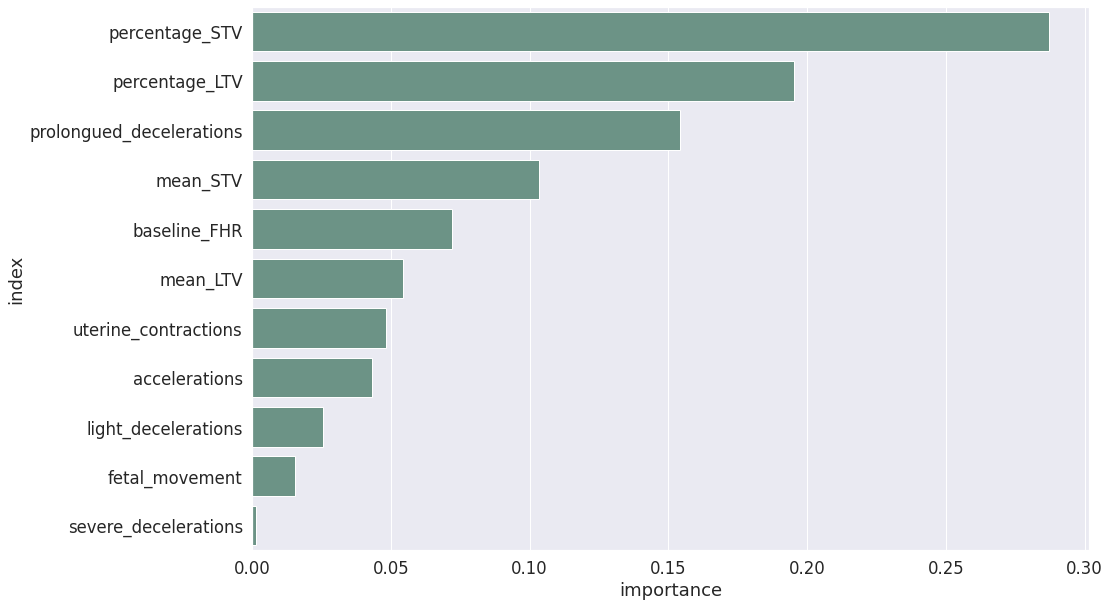

In [47]:
feature_importances = pd.DataFrame(gb.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.barplot(x='importance', y='index', color='#698',data=feature_importances.reset_index())

percentage_STV, percentage_LTV, prolonged_decelerations are features with the most contributions.

#**Insight and Recommendations**

Insights:
* This dataset has the value F1 Score of Gradient Boosting of 85%. This shows that this dataset can be used as a guide for fetal well-being to avoid fetal death.

* Variables that can be used to determine the condition of the fetus or fetal category in this dataset are uterine contractions, accelerations, and prolonged decelerations.

  CTG results, in normal fetal conditions:
    * Basic fetal heart rate with a range of 110 - 160 beats per minute.
    * uterine contractions with a range of 0 - 0.015 per second.
    * acceleration (increased fetal heart rate) with a range of 0 - 0.019 per second.
    * Prolonged decelerations (prolonged decrease in fetal heart rate) do not occur or if they occur no more than 0.003 per second.

* The relationship between variables that can determine fetal category is in healthy fetuses when uterine contractions decrease, accelerations increase and there is no prolonged deceleration as well as otherwise.

Recommendations:
* Cardiotocography examination is very important for pregnant women to avoid disturbances related to fetal hypoxia. Especially pregnancy accompanied by complications such as pre-eclampsia, rupture of membranes, pregnancy more than 40 weeks, diabetes, hypertension, asthma, thyroid, chronic infectious diseases and complications of other diseases.